In [1]:
import scanpy as sc
import pandas as pd
import numpy as np
import anndata as ad
import scipy as sp

from test import utils,scv

In [2]:
# read UMI counts and params for c57 and cast viariants
# UMI_c57 = pd.read_csv('data_arme/F1_ref/umiSplit_c57.qc.csv', index_col=0)
# UMI_cast = pd.read_csv('data_arme/F1_ref/umiSplit_cast.qc.csv', index_col=0)

# UMI = UMI_c57 + UMI_cast

# # transpose to ge n_cells x n_genes shape
# UMI_c57_T = UMI_c57.transpose(copy=True)
# UMI_cast_T = UMI_cast.transpose(copy=True)
# UMI_T = UMI.transpose(copy=True)

# adata = ad.AnnData(UMI_T)
# adata.layers['spliced'] = UMI_c57_T
# adata.layers['unspliced'] = UMI_cast_T

# gtf = pd.read_csv("data/Mus_musculus.GRCm38.102.chr.gtf", sep='\t', skiprows=5, header=None)
# gtf.columns = ['chr', 'database', 'type', 'start', 'end', '.', 'strand', '.', 'other']
# gtf = gtf[gtf['type'] == "gene"]
# gtf = gtf.reset_index()

# dic_gene_names = {}
# index = 0
# for line in gtf['other'].tolist():
#     line = line.split(';')
#     dic_gene_names[line[0][9:-1]]= [gtf['chr'][index], line[2][12:-1]]
#     index += 1
    
# adata.var['gene_name'] = [dic_gene_names[x][1] if x in dic_gene_names.keys() else 'NA' for x in adata.var.index]
# adata.var['chromosome'] = [dic_gene_names[x][0] if x in dic_gene_names.keys() else 'NA' for x in adata.var.index]


# label = []
# for chrom in adata.var['chromosome']:
#     if chrom == "X":
#         label.append('X')
#     elif chrom == "Y":
#         label.append('Y')
#     else:
#         label.append('autosome')
# adata.var['autosomes'] = label

# label = []
# for chrom in adata.var['chromosome']:
#     if chrom == "MT":
#         label.append('MT')
#     else:
#         label.append('nuclear')
# adata.var['nuclear'] = label

# label = []
# for genes in adata.var['gene_name']:
#     if genes[:2]=='Rp':
#         label.append('Ribosomal protein')
#     else:
#         label.append('other protein')
# adata.var['Ribosomal_prot'] = label

# utils.remove_na(adata)
# utils.find_ratios_sum(adata)
# utils.find_ratios_std(adata)
# utils.get_p_values(adata)

In [3]:
# method set to gauss as there is problem with numpy and numba version
# sc.pp.neighbors(adata, n_neighbors=8, n_pcs=31, use_rep='X',method='gauss')
# sc.tl.umap(adata)
# sc.tl.leiden(adata)
# adata.obs['clusters'] = adata.obs['leiden'].copy()

In [4]:
# adata.var['chromosome'] = adata.var['chromosome'].astype('str') 
# adata.var['chromosome']

In [5]:
# adata.write('data/test_scv.h5ad')

In [6]:
adata = sc.read_h5ad('data/test_scv.h5ad')

In [7]:
adata

AnnData object with n_obs × n_vars = 682 × 3134
    obs: 'leiden', 'clusters'
    var: 'gene_name', 'chromosome', 'autosomes', 'nuclear', 'Ribosomal_prot', 'sum_allele_1', 'sum_allele_2', 'ratio_allele_1', 'ratio_allele_2', 'ratio_sum_allele_1', 'ratio_sum_allele_2', 'ratio_mean_allele_1', 'ratio_mean_allele_2', 'ratio_std_allele_1', 'ratio_std_allele_2', 'p_value'
    uns: 'leiden', 'neighbors', 'umap'
    obsm: 'X_umap'
    layers: 'ratio_allele_1', 'ratio_allele_2', 'spliced', 'unspliced'
    obsp: 'connectivities', 'distances'

Filtered out 1286 genes that are detected 10 counts (shared).
Normalized count data: X, spliced, unspliced.
Skip filtering by dispersion since number of variables are less than `n_top_genes`.
computing neighbors
    finished (0:00:00) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


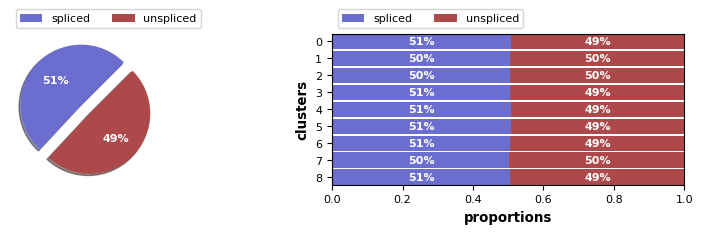

In [8]:
test = scv.ScVelo(adata)

In [10]:
adata.var['ENSMUSG00000006057']

KeyError: 'ENSMUSG00000006050'